Import Libs

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
import pandas as pd

Open Data file

In [3]:
data = pd.read_csv('../dataset/Retail_Store_Data.csv')
data.head()

,Customer_ID,Purchase_Amount,Visit_Duration,Items_Purchased,Store_Section,Weekday
0,1,174.835708,28.423084,2,Groceries,Tuesday
1,2,143.086785,21.502462,7,Electronics,Sunday
2,3,182.384427,80.007327,5,Apparel,Saturday
3,4,226.151493,87.712330,5,Groceries,Saturday
4,5,138.292331,13.474476,8,Groceries,Tuesday


In [4]:
data.describe()

,Customer_ID,Purchase_Amount,Visit_Duration,Items_Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,150.966603,65.401369,4.929000
std,288.819436,48.960797,31.719252,2.096749
min,1.000000,-12.063367,10.354009,0.000000
25%,250.750000,117.620485,37.191903,3.000000
50%,500.500000,151.265031,66.773863,5.000000
75%,750.250000,182.397194,92.095050,6.000000
max,1000.000000,342.636575,119.935510,12.000000


In [6]:
#check for null values
data.isnull().sum()

Customer_ID        0
Purchase_Amount    0
Visit_Duration     0
Items_Purchased    0
Store_Section      0
Weekday            0
dtype: int64

Probability analysis

- Bernoulli Distribution:

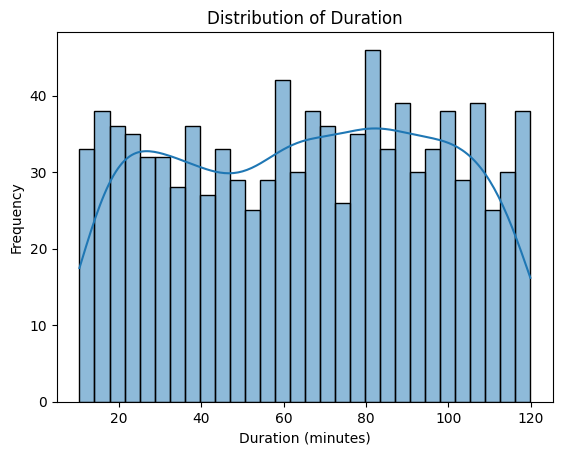

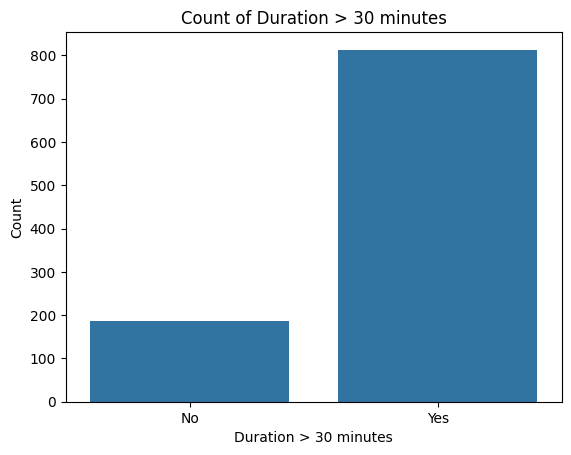

Probability of duration > 30 minutes: 0.81
Mean Visit Duration: 65.40 minutes
Standard Deviation of Visit Duration: 31.72 minutes


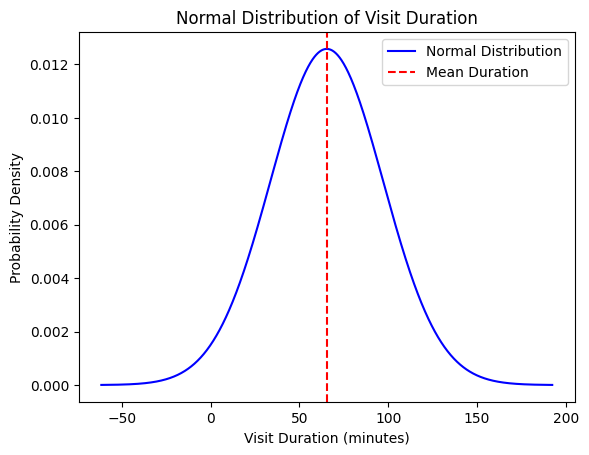

In [9]:
# compute duration>30 column for bernoulli distribution

data['duration_gt_30'] = (data['Visit_Duration'] > 30).astype(int)
# plot the distribution of duration
sns.histplot(data['Visit_Duration'], kde=True, bins=30)
plt.title('Distribution of Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()
# plot the distribution of duration_gt_30
sns.countplot(x='duration_gt_30', data=data)
plt.title('Count of Duration > 30 minutes')
plt.xlabel('Duration > 30 minutes')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

#compute bernoulli distribution parameters
p = data['duration_gt_30'].mean()
print(f"Probability of duration > 30 minutes: {p:.2f}")
# compute the mean and standard deviation of the visit duration
mean_duration = data['Visit_Duration'].mean()
std_duration = data['Visit_Duration'].std()
print(f"Mean Visit Duration: {mean_duration:.2f} minutes")
print(f"Standard Deviation of Visit Duration: {std_duration:.2f} minutes")
# plot the normal distribution of visit duration
x = np.linspace(mean_duration - 4*std_duration, mean_duration + 4*std_duration, 1000)
y = norm.pdf(x, mean_duration, std_duration)
plt.plot(x, y, label='Normal Distribution', color='blue')
plt.title('Normal Distribution of Visit Duration')
plt.xlabel('Visit Duration (minutes)')
plt.ylabel('Probability Density')
plt.axvline(mean_duration, color='red', linestyle='--', label='Mean Duration')
plt.legend()
plt.show()


- Binomial Distribution:
  * Consider 10 random visits; analyze the number of visits where customers spent over $100 using the binomial distribution